# 手寫辨識機器學習

In [73]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam
from keras.utils import np_utils
from ipywidgets import interact_manual
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [74]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [75]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Normalization

In [76]:
x_train_1 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_1 = (x_test - x_test.min()) / (x_test.max()- x_test.min())

## Model1 : 

In [77]:
model1 = Sequential()
model1.add(Dense(4, input_dim=784))
model1.add(Activation('sigmoid'))
model1.add(Dense(2))
model1.add(Activation('elu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_31 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_32 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_33 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_1 = model1.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1859 - acc: 0.9295 - val_loss: 0.1515 - val_acc: 0.9391
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1403 - acc: 0.9462 - val_loss: 0.1294 - val_acc: 0.9525
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1290 - acc: 0.9523 - val_loss: 0.1306 - val_acc: 0.9522
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1254 - acc: 0.9541 - val_loss: 0.1255 - val_acc: 0.9562
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1231 - acc: 0.9556 - val_loss: 0.1253 - val_acc: 0.9568
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1216 - acc: 0.9575 - val_loss: 0.1243 - val_acc: 0.9586
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1205 - acc: 0.9587 - val_loss: 0.1273 - val_acc

## Model2 : 

In [87]:
model2 = Sequential()
model2.add(Dense(4, input_dim=784))
model2.add(Activation('relu'))
model2.add(Dense(2))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_37 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_38 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_39 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_2 = model2.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1923 - acc: 0.9246 - val_loss: 0.1598 - val_acc: 0.9348
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1572 - acc: 0.9355 - val_loss: 0.1527 - val_acc: 0.9359
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1520 - acc: 0.9376 - val_loss: 0.1510 - val_acc: 0.9381
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1491 - acc: 0.9422 - val_loss: 0.1488 - val_acc: 0.9432
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1447 - acc: 0.9450 - val_loss: 0.1458 - val_acc: 0.9420
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1423 - acc: 0.9470 - val_loss: 0.1437 - val_acc: 0.9471
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1410 - acc: 0.9484 - val_loss: 0.1445 - val_acc

In [89]:
predict1 = model1.predict_classes(x_test)
predict2 = model2.predict_classes(x_test)

In [90]:
def test1(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict1[測試編號])
def test2(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict2[測試編號])

In [91]:
interact_manual(test1, 測試編號=(0, 9999));
interact_manual(test2, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [92]:
score1 = model1.evaluate(x_test, y_test)
print('model1:')
print('loss:', score1[0])
print('正確率:', score1[1])
score2 = model2.evaluate(x_test, y_test)
print('model2:')
print('loss:', score2[0])
print('正確率:', score2[1])

10000/10000 [==============================] - 1s 51us/step
model1:
loss: 0.2128062884092331
正確率: 0.9388799847602844
10000/10000 [==============================] - 0s 48us/step
model2:
loss: 1.286995681476593
正確率: 0.9038999839782715


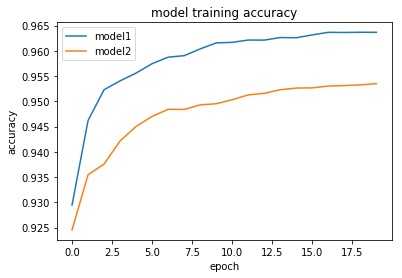

In [93]:
plt.plot(model_1.history["acc"])
plt.plot(model_2.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model1", "model2"], loc="best")
plt.show()

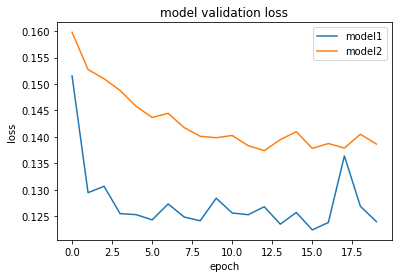

In [94]:
plt.plot(model_1.history["val_loss"])
plt.plot(model_2.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model1", "model2"], loc="best")
plt.show()